# **Two Wheeler Rental Prediction: Multiple Linear Regression**

## <font color= steelblue>1. Introduction:<font>

### <font color= indigo>Problem Statement:<font>
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, **BikeIndia** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.
___________________________________________________________________________________________________________________

### <font color= indigo>Business Goal:<font>
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## <font color= steelblue>2. Getting Jupyter Ready:<font>

In [855]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
import statsmodels.stats.api as sms
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# supress warnings
import warnings
warnings.filterwarnings('ignore')

## <font color= steelblue>3. Reading and Understanding the Data:<font>

In [712]:
bike = pd.DataFrame(pd.read_csv("day.csv"))

In [713]:
# Checking the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [714]:
# Checking the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [715]:
# Descriptive statistics for Numerical columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [716]:
# Check the shape of df
print(bike.shape)

(730, 16)


#### <b> <font color= darkslategray>Insights:<font>
<b> <font color= darkcyan>
Dataset has 730 rows and 16 columns.  
    
<b> <font color= darkcyan>
Except one column, all other are either float or integer type.   
    
<b> <font color= darkcyan>
One column is date type.
<b> <font color= darkcyan>
Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type. 
    
<b> <font color= darkcyan>
We will analyse and finalize whether to convert them to categorical or treat as integer.
<font>

## <font color= steelblue>4. Data Quality Check:<font>

### <font color= indigo>Check for NULL/MISSING values:<font>

In [717]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [718]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### <b> <font color= darkslategray>Insights:<font>
<b> <font color= darkcyan>
There are no missing / Null values either in columns or rows 
<font>

### <font color= indigo>Duplicate Check:<font>

In [719]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [720]:
bike_dup.shape

(730, 16)

In [721]:
bike.shape

(730, 16)

#### <b> <font color= darkslategray>Insights:<font>
<b> <font color= darkcyan>
The shape after running the drop duplicate command is same as the original dataframe.
    
<b> <font color= darkcyan>
Hence we can conclude that there were zero duplicate values in the dataset.
<font>

### <font color= indigo>Data Cleaning:<font>

Checking value_counts() for entire dataframe.
This will help to identify any Unknow/Junk values present in the dataset.

In [722]:
#Create a copy of the  dataframe, without the 'instant' column, 
#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [723]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

#### <b> <font color= darkslategray>Insights:<font>
<b> <font color= darkcyan>
There seems to be no Junk/Unknown values in the entire dataset.
<font>

### <font color= indigo>Removing redundant & unwanted columns:<font>

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. **instant** : Its only an index value

2. **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

3. **casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [724]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [725]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [726]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### <font color= indigo>Creating Dummy Variables:<font>

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

- Before creating dummy variables, we will have to convert them into 'category' data types.

In [727]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [728]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [729]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [730]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [731]:
bike_new.shape

(730, 30)

### <font color= indigo>Splitting the data:<font>

- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
- We will use train_test_split method from sklearn package for this

In [732]:
# Check the shape before spliting
bike_new.shape

(730, 30)

In [733]:
# Check the info before spliting
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [734]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [735]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [736]:
df_train.shape

(510, 30)

In [737]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

In [738]:
df_test.shape

(219, 30)

## <font color= steelblue>5. Exploratory Data Analysis:<font>

### <font color= indigo>Visualising Numeric Variables:<font>

Let's make a pairplot of all the numeric variables.

In [739]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [740]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

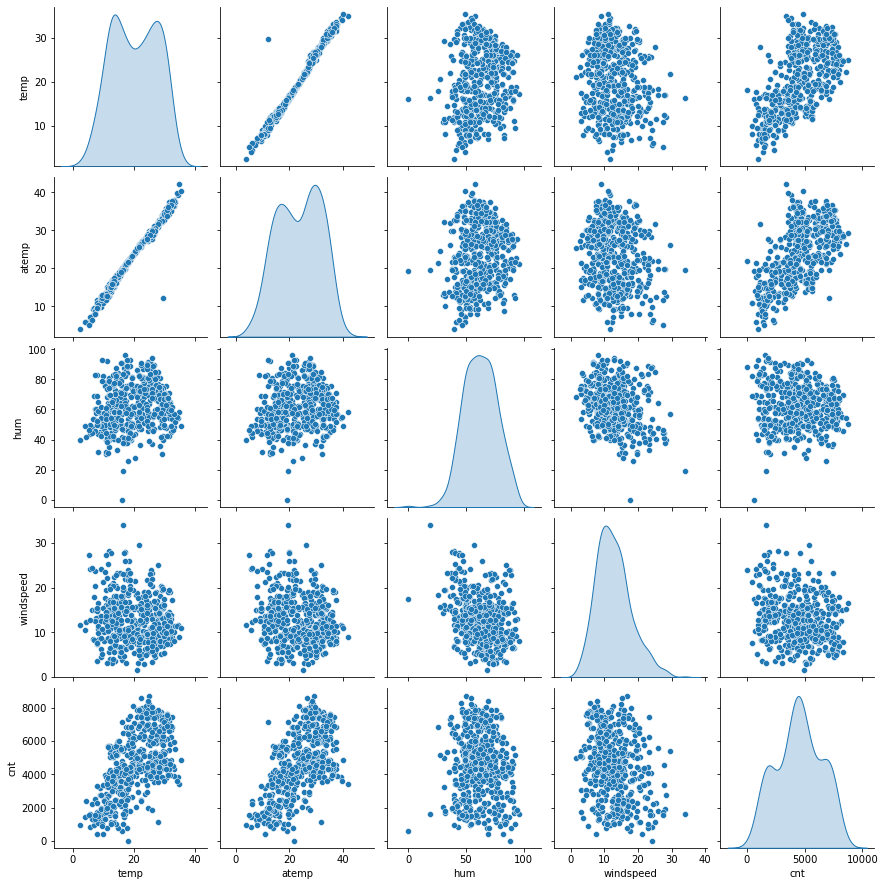

In [741]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

#### <b> <font color= darkslategray>Insights:<font>
<b> <font color= darkcyan>
The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'.
<font>

### <font color= indigo>Visualising Catagorical Variables:<font>

In [742]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

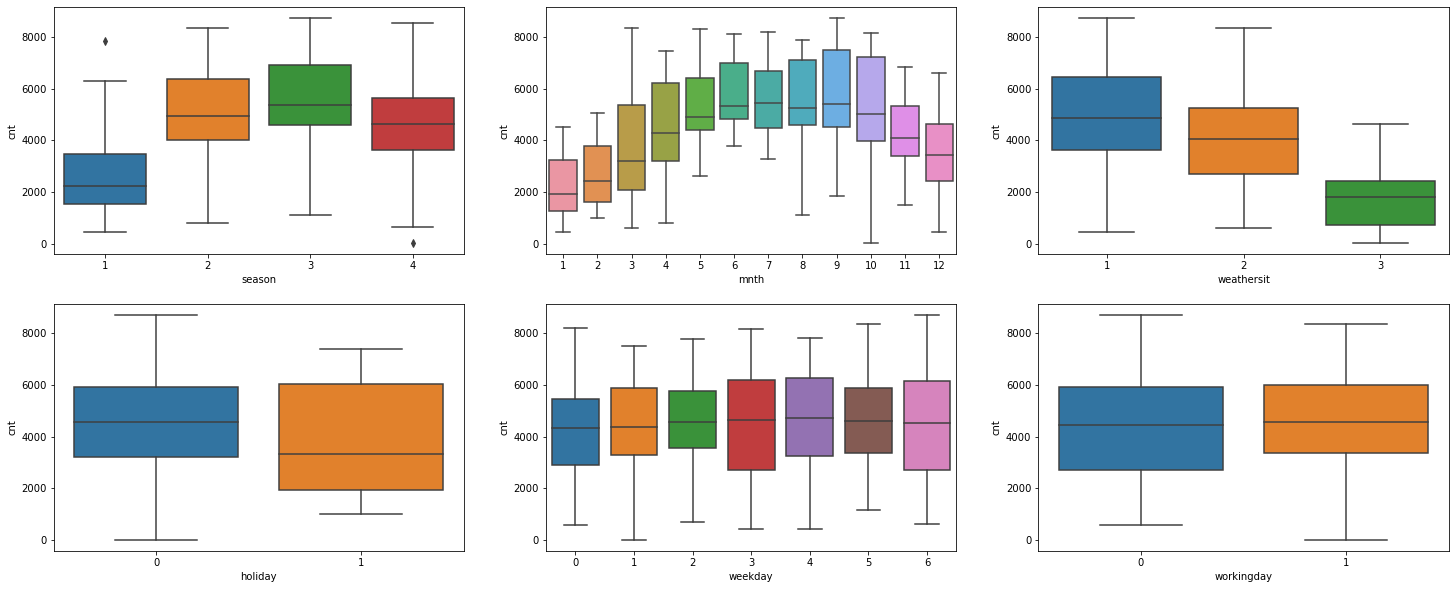

In [743]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

#### <b> <font color= darkslategray>Insights:<font>
There were 6 categorical variables in the dataset.
    
We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .
    
The inference that We could derive were:
    
**season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

**mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

**weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
    
**holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
    
**weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
    
**workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

### <font color= indigo>Correlation Matrix:<font>

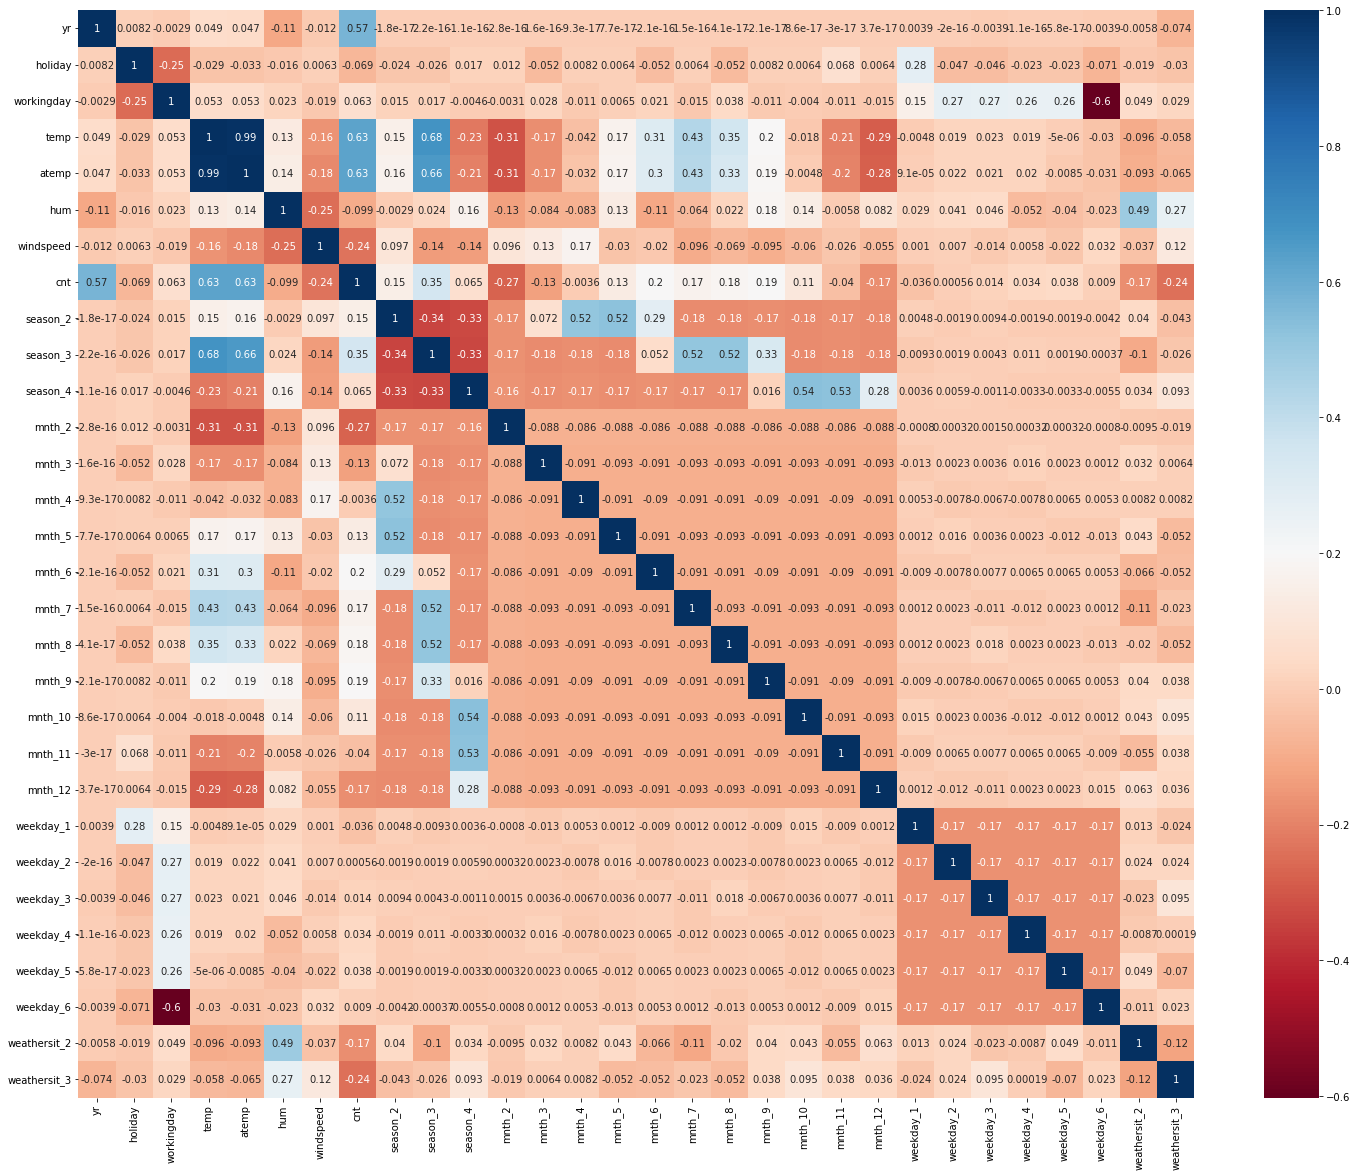

In [744]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

#### <b> <font color= darkslategray>Insights:<font>
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We can see that **temp** and **atemp** are almost perfectly correlated. Also **workingday** and **weekday_6** shows high degree of negative correlation
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## <font color= steelblue>6. Rescaling the Features:<font>

**Why Feature Scaling?**
- To bring all the variable in same range
- scaling of the data makes it easy for a model to learn and understand the problem.
- If not scale, the feature with a higher value range starts dominating when calculating distances.


In [745]:
scaler = MinMaxScaler()

In [746]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [747]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [748]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [749]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [750]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <font color= steelblue>7. Building a Linear Model using Recursive Feature Elimination:<font>

### <font color= indigo>Dividing into X and Y sets for the model building<font>

In [751]:
y_train = df_train.pop('cnt')
X_train = df_train

**RFE**
Recursive feature elimination: We will be using the **LinearRegression** function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [752]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [753]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 10),
 ('mnth_8', False, 6),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [754]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_9', 'mnth_10', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [755]:
X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12'],
      dtype='object')

In [756]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## <font color= steelblue>8. Building Linear Model using 'STATS MODEL':<font>

### <font color= indigo>Model 1<font>

**VIF Check**

In [757]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,weekday_4,inf
2,workingday,inf
1,holiday,inf
16,weekday_5,inf
12,weekday_1,inf
13,weekday_2,inf
14,weekday_3,inf
3,temp,387.29
4,atemp,365.75
5,hum,17.84


In [758]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [759]:
# Check the parameters obtained

lr1.params

const           0.208815
yr              0.229757
holiday        -0.006272
workingday      0.033419
temp            0.409830
atemp           0.085486
hum            -0.183973
windspeed      -0.184213
season_2        0.123975
season_3        0.069708
season_4        0.142576
mnth_9          0.099366
mnth_10         0.055965
weekday_1      -0.017374
weekday_2       0.001985
weekday_3       0.014191
weekday_4       0.012832
weekday_5       0.015513
weekday_6       0.052004
weathersit_2   -0.046013
weathersit_3   -0.267368
dtype: float64

In [760]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     136.4
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          1.01e-181
Time:                        15:47:38   Log-Likelihood:                 508.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     490   BIC:                            -891.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2088      0.030      7.010   

- <font color= darkslategray>Removing **weekday_2** based on its High vif and High P-value.<font>

### <font color= indigo>Model 2<font>

In [761]:
X_train_new = X_train_rfe.drop(["weekday_2"], axis = 1)

**VIF Check**

In [762]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,387.29
4,atemp,365.75
5,hum,17.84
2,workingday,9.06
8,season_3,6.89
6,windspeed,4.71
7,season_2,3.50
9,season_4,2.90
17,weathersit_2,2.15
12,weekday_1,2.11


In [763]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [764]:
lr2.params

const           0.208815
yr              0.229757
holiday        -0.004287
workingday      0.035404
temp            0.409830
atemp           0.085486
hum            -0.183973
windspeed      -0.184213
season_2        0.123975
season_3        0.069708
season_4        0.142576
mnth_9          0.099366
mnth_10         0.055965
weekday_1      -0.019359
weekday_3       0.012206
weekday_4       0.010847
weekday_5       0.013528
weekday_6       0.052004
weathersit_2   -0.046013
weathersit_3   -0.267368
dtype: float64

In [765]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     136.4
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          1.01e-181
Time:                        15:47:39   Log-Likelihood:                 508.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     490   BIC:                            -891.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2088      0.030      7.010   

- Removing the variable **atemp** based on its High p-value & High VIF

### <font color= indigo>Model 3<font>

In [766]:
X_train_new = X_train_new.drop(["atemp"], axis = 1)

**VIF Check**

In [767]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,23.29
4,hum,17.54
2,workingday,9.06
7,season_3,6.80
5,windspeed,4.56
6,season_2,3.50
8,season_4,2.89
16,weathersit_2,2.14
11,weekday_1,2.11
12,weekday_3,2.10


In [768]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [769]:
lr3.params

const           0.210343
yr              0.229739
holiday        -0.004990
workingday      0.035417
temp            0.490587
hum            -0.183332
windspeed      -0.187584
season_2        0.124158
season_3        0.068318
season_4        0.142976
mnth_9          0.099372
mnth_10         0.056042
weekday_1      -0.019178
weekday_3       0.012086
weekday_4       0.010887
weekday_5       0.012904
weekday_6       0.052043
weathersit_2   -0.046186
weathersit_3   -0.267889
dtype: float64

In [770]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.2
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          1.00e-182
Time:                        15:47:39   Log-Likelihood:                 507.94
No. Observations:                 510   AIC:                            -977.9
Df Residuals:                     491   BIC:                            -897.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2103      0.030      7.091   

- Removing the variable **hum** based on its Very High 'VIF' value.
- Even though the VIF of hum is second highest, we decided to drop **hum** and not **temp** based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

### <font color= indigo>Model 4<font>

In [771]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [772]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,17.06
2,workingday,8.36
6,season_3,6.54
4,windspeed,4.30
5,season_2,3.48
7,season_4,2.79
10,weekday_1,2.11
11,weekday_3,2.10
13,weekday_5,2.05
0,yr,2.03


In [773]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [774]:
lr4.params

const           0.103740
yr              0.234369
holiday        -0.002689
workingday      0.035789
temp            0.457253
windspeed      -0.148025
season_2        0.124562
season_3        0.076016
season_4        0.137267
mnth_9          0.090260
mnth_10         0.054963
weekday_1      -0.020058
weekday_3       0.013330
weekday_4       0.015040
weekday_5       0.017453
weekday_6       0.053086
weathersit_2   -0.076525
weathersit_3   -0.321210
dtype: float64

In [775]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     144.5
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          9.02e-179
Time:                        15:47:39   Log-Likelihood:                 495.80
No. Observations:                 510   AIC:                            -955.6
Df Residuals:                     492   BIC:                            -879.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1037      0.021      5.039   

- Removing the variable **workingday** based on its Very High 'VIF' value.
- Even though the VIF of hum is second highest, we decided to drop **workingday** and not **temp** based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

### <font color= indigo>Model 5<font>

In [776]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

**VIF Check**

In [777]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.72
5,season_3,6.44
3,windspeed,4.02
4,season_2,3.45
6,season_4,2.79
0,yr,2.02
8,mnth_10,1.66
14,weathersit_2,1.52
9,weekday_1,1.51
10,weekday_3,1.46


In [778]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [779]:
lr5.params

const           0.121206
yr              0.234998
holiday        -0.038489
temp            0.459883
windspeed      -0.148510
season_2        0.122443
season_3        0.074094
season_4        0.135644
mnth_9          0.089631
mnth_10         0.053704
weekday_1      -0.001963
weekday_3       0.031361
weekday_4       0.033090
weekday_5       0.035601
weekday_6       0.035393
weathersit_2   -0.075821
weathersit_3   -0.320259
dtype: float64

In [780]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     151.9
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          9.90e-179
Time:                        15:47:39   Log-Likelihood:                 493.07
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     493   BIC:                            -880.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1212      0.019      6.305   

- Removing the variable **season_3** based on its Very High 'VIF' value.
- Even though the VIF of hum is second highest, we decided to drop **season_3** and not **temp** based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.
- Also we can see from **Correlation Matrix** above, that **temp** highly correlated to **season_3**.

### <font color= indigo>Model 6<font>

In [781]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

**VIF Check**

In [782]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.42
3,windspeed,3.82
0,yr,2.00
5,season_4,1.95
7,mnth_10,1.63
4,season_2,1.57
8,weekday_1,1.51
13,weathersit_2,1.51
9,weekday_3,1.45
11,weekday_5,1.43


In [783]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [784]:
lr6.params

const           0.105831
yr              0.233342
holiday        -0.041444
temp            0.556600
windspeed      -0.152297
season_2        0.081749
season_4        0.111251
mnth_9          0.099577
mnth_10         0.043867
weekday_1      -0.000669
weekday_3       0.031474
weekday_4       0.032394
weekday_5       0.037460
weekday_6       0.037414
weathersit_2   -0.076235
weathersit_3   -0.314459
dtype: float64

In [785]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          3.35e-177
Time:                        15:47:39   Log-Likelihood:                 486.75
No. Observations:                 510   AIC:                            -941.5
Df Residuals:                     494   BIC:                            -873.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1058      0.019      5.590   

- Removing the variable **weekday_1** based on its Very High p-value.

### <font color= indigo>Model 7<font>

In [786]:
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

**VIF Check**

In [787]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.23
3,windspeed,3.70
0,yr,2.00
5,season_4,1.95
7,mnth_10,1.63
4,season_2,1.57
12,weathersit_2,1.50
8,weekday_3,1.33
11,weekday_6,1.32
10,weekday_5,1.31


In [788]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [789]:
lr7.params

const           0.105620
yr              0.233339
holiday        -0.041792
temp            0.556606
windspeed      -0.152276
season_2        0.081748
season_4        0.111266
mnth_9          0.099568
mnth_10         0.043811
weekday_3       0.031684
weekday_4       0.032605
weekday_5       0.037671
weekday_6       0.037619
weathersit_2   -0.076240
weathersit_3   -0.314464
dtype: float64

In [790]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.1
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          2.53e-178
Time:                        15:47:39   Log-Likelihood:                 486.75
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     495   BIC:                            -880.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1056      0.018      5.747   

- Removing the variable **holiday** based on its Very High p-value.

### <font color= indigo>Model 8<font>

In [791]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

**VIF Check**

In [792]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.22
2,windspeed,3.69
0,yr,1.99
4,season_4,1.94
6,mnth_10,1.63
3,season_2,1.57
11,weathersit_2,1.50
7,weekday_3,1.33
9,weekday_5,1.31
10,weekday_6,1.31


In [793]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [794]:
lr8.params

const           0.104497
yr              0.232790
temp            0.556422
windspeed      -0.153052
season_2        0.081955
season_4        0.110435
mnth_9          0.100586
mnth_10         0.043421
weekday_3       0.032768
weekday_4       0.033595
weekday_5       0.038879
weekday_6       0.039310
weathersit_2   -0.075850
weathersit_3   -0.313436
dtype: float64

In [795]:
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.5
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          5.60e-179
Time:                        15:47:39   Log-Likelihood:                 485.60
No. Observations:                 510   AIC:                            -943.2
Df Residuals:                     496   BIC:                            -883.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1045      0.018      5.684   

- Removing the variable **mnth_10** based on its Very High p-value.

### <font color= indigo>Model 9<font>

In [796]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

**VIF Check**

In [797]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.11
2,windspeed,3.65
0,yr,1.99
3,season_2,1.56
10,weathersit_2,1.50
4,season_4,1.38
6,weekday_3,1.33
8,weekday_5,1.31
9,weekday_6,1.31
7,weekday_4,1.29


In [798]:
# Add a constant
X_train_lm9 = sm.add_constant(X_train_new)

# Create a first fitted model
lr9 = sm.OLS(y_train, X_train_lm9).fit()

In [799]:
lr9.params

const           0.102133
yr              0.231622
temp            0.563739
windspeed      -0.156002
season_2        0.080779
season_4        0.125990
mnth_9          0.093939
weekday_3       0.032969
weekday_4       0.033687
weekday_5       0.038420
weekday_6       0.039705
weathersit_2   -0.074137
weathersit_3   -0.307869
dtype: float64

In [800]:
# Print a summary of the linear regression model obtained
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.4
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          6.09e-179
Time:                        15:47:39   Log-Likelihood:                 482.77
No. Observations:                 510   AIC:                            -939.5
Df Residuals:                     497   BIC:                            -884.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1021      0.018      5.538   

- Removing the variable **weekday_4** based on its Very High p-value.

### <font color= indigo>Model 10<font>

In [801]:
X_train_new = X_train_new.drop(["weekday_4"], axis = 1)

**VIF Check**

In [802]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.01
2,windspeed,3.57
0,yr,1.99
3,season_2,1.56
9,weathersit_2,1.49
4,season_4,1.38
6,weekday_3,1.26
7,weekday_5,1.25
8,weekday_6,1.24
5,mnth_9,1.20


In [803]:
# Add a constant
X_train_lm10 = sm.add_constant(X_train_new)

# Create a first fitted model
lr10 = sm.OLS(y_train, X_train_lm10).fit()

In [804]:
lr10.params

const           0.109119
yr              0.231265
temp            0.564058
windspeed      -0.154904
season_2        0.081712
season_4        0.125749
mnth_9          0.095510
weekday_3       0.024891
weekday_5       0.030643
weekday_6       0.031787
weathersit_2   -0.073743
weathersit_3   -0.303656
dtype: float64

In [805]:
# Print a summary of the linear regression model obtained
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          9.24e-179
Time:                        15:47:39   Log-Likelihood:                 479.56
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     498   BIC:                            -884.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1091      0.018      5.954   

- Removing the variable **weekday_3** based on its Very High p-value.

### <font color= indigo>Model 11<font>

In [806]:
X_train_new = X_train_new.drop(["weekday_3"], axis = 1)

**VIF Check**

In [807]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.89
2,windspeed,3.54
0,yr,1.99
3,season_2,1.56
8,weathersit_2,1.49
4,season_4,1.37
5,mnth_9,1.20
6,weekday_5,1.20
7,weekday_6,1.20
9,weathersit_3,1.07


In [808]:
# Add a constant
X_train_lm11 = sm.add_constant(X_train_new)

# Create a first fitted model
lr11 = sm.OLS(y_train, X_train_lm11).fit()

In [809]:
lr11.resid

483    0.045232
650    0.122643
212   -0.084589
714   -0.152638
8      0.030996
         ...   
467    0.054140
444    0.049764
46     0.017609
374   -0.056513
366   -0.175035
Length: 510, dtype: float64

In [810]:
lr11.params

const           0.114949
yr              0.230728
temp            0.564587
windspeed      -0.156605
season_2        0.081498
season_4        0.125343
mnth_9          0.095002
weekday_5       0.025495
weekday_6       0.026524
weathersit_2   -0.073467
weathersit_3   -0.298163
dtype: float64

In [811]:
# Print a summary of the linear regression model obtained
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.4
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          4.44e-179
Time:                        15:47:39   Log-Likelihood:                 477.50
No. Observations:                 510   AIC:                            -933.0
Df Residuals:                     499   BIC:                            -886.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1149      0.018      6.333   

#### <b> <font color= darkslategray>Insights:<font>
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).


## <font color= steelblue>9. Final Model Interpretation:<font>

### <font color= indigo>Hypothesis Testing<font>

Hypothesis testing states that:

- H0:B1=B2=...=Bn=0
- H1: at least one Bi != 0

**lr11 model coefficient values:**

- const        :    **0.114949**

- yr           :    **0.230728**

- temp         :    **0.564587**

- windspeed    :   **-0.156605**

- season_2     :    **0.081498**

- season_4     :    **0.125343**

- mnth_9       :    **0.095002**

- weekday_5    :    **0.025495**

- weekday_6    :    **0.026524**

- weathersit_2 :   **-0.073467**

- weathersit_3 :   **-0.298163**

#### <b> <font color= darkslategray>Insights:<font>
From the lr11 model summary, it is evident that all our coefficients are not equal to zero which means **We REJECT the NULL HYPOTHESIS**

#### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: **228.4**
- Prob (F-statistic): **4.44e-179**

The F-Statistics value of 228.4 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

#### The equation of best fitted surface based on model lr11:

cnt = 0.114949 + (**yr** × 0.230728) + (**temp** × 0.564587) − (**windspeed** × 0.156605) + (**season2** × 0.081498) + (**season4** ×0.125343) + (**mnth9** × 0.095002) + (**weekday5** × 0.025495) + (**weekday6** × 0.026524) − (**weathersit2** × 0.073467) − (**weathersit3** × 0.298163)

### <font color= indigo>Interpretation of Coefficients:<font>

**temp**: A coefficient value of ‘0.564587’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.564587 units.

**weathersit_3**: A coefficient value of ‘-0.298163’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.298163 units.

**yr**: A coefficient value of ‘0.230728’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.230728 units.

**season_4**: A coefficient value of ‘0.125343’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.125343 units.

**windspeed**: A coefficient value of ‘-0.156605’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.156605 units.

**season_2**: A coefficient value of ‘0.081498’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.081498 units.

**mnth_9**: A coefficient value of ‘0.095002’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.095002 units.

**weekday_5**: A coefficient value of ‘0.025495’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.025495 units.

**weekday_6**: A coefficient value of ‘0.026524’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.026524 units.

**weathersit_2**: A coefficient value of ‘-0.073467’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.073467** units.



## <font color= steelblue>10. Assumptions:<font>

### <font color= indigo>1. Linearity in Parameters<font>

**Rainbow Test**         
The basic idea of the Rainbow test is that even if the true relationship is non-linear, a good linear fit can be achieved on a subsample in the “middle” of the data. The null hypothesis is rejected whenever the overall fit is significantly worse than the fit for the subsample. The test statistic under H_0 follows an F distribution with parameter degrees of freedom.

In [812]:
def Rainbow_lin_test(model):
    lin_p = sm.stats.linear_rainbow(model, frac= 0.5)[1]
    F= sm.stats.linear_rainbow(model, frac= 0.5)[0]
    result= "Fail"
    if lin_p>0.1:
        result= "Pass"
    return (np.transpose(pd.DataFrame([F, lin_p, 0.1, result], columns= ['Rainbow Linearity P-value'], index=['F Stat','P-value', 'Threshold', 'Result'])))
    

In [813]:
Rainbow_lin_test(lr11)

,F Stat,P-value,Threshold,Result
Rainbow Linearity P-value,0.833851,0.924235,0.1,Pass


#### <b> <font color= darkslategray>Insights:<font>
**Rainbow test gives a p-value of 0.924 which implies that we don't have sufficient evidence to reject null hypothesis. Hence we conclude that the overall fit is almost same as the fit for the subsample.**

### <font color= indigo>2. Error terms are normally distributed with mean zero <font>

In [814]:
y_train_pred = lr11.predict(X_train_lm11)

**Normallity using Distribution Plot**

Text(0.5, 0, 'Errors')

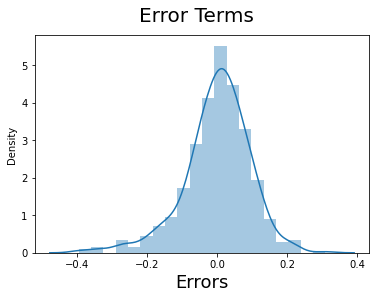

In [815]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

#### <b> <font color= darkslategray>Insights:<font>
**From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.**

**Normallity using Q-Q Plot**

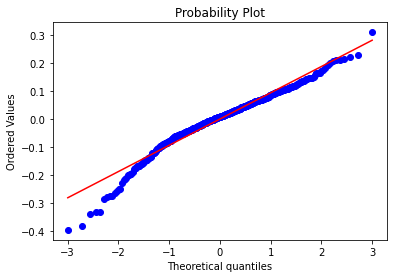

In [816]:
stats.probplot(res, dist="norm", plot=plt)
plt.show()

#### <b> <font color= darkslategray>Insights:<font>
**Most of the observations fall on the 45 degree line, which suggests that the distribution is approximately Gaussian, with some deviation towards the smaller values of the variable.**

### <font color= indigo>3. No perfect Multicollinearity between the predictor variables<font>

**Correlation Matrix**

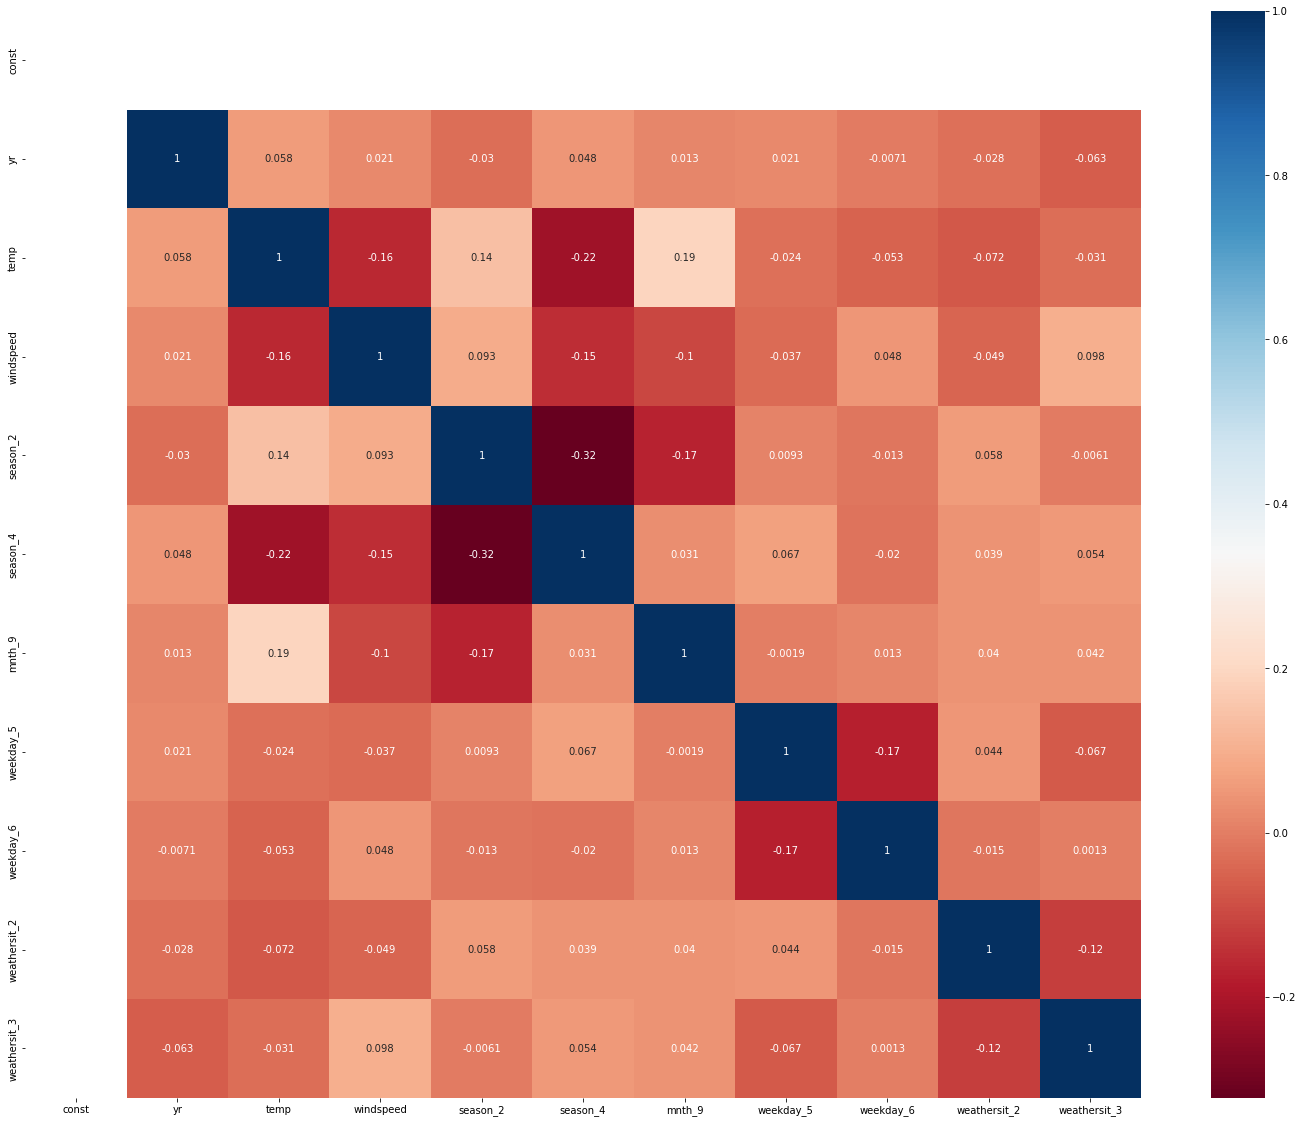

In [817]:
plt.figure(figsize = (25,20))
sns.heatmap(X_train_lm11.corr(), annot = True, cmap="RdBu")
plt.show()

**VIF check**

In [818]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.89
2,windspeed,3.54
0,yr,1.99
3,season_2,1.56
8,weathersit_2,1.49
4,season_4,1.37
5,mnth_9,1.20
6,weekday_5,1.20
7,weekday_6,1.20
9,weathersit_3,1.07


#### <b> <font color= darkslategray>Insights:<font>
- **From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.**
- **Also from the correlation matrix, we can see that there is no or insignificant correlation within the independent variables**

### <font color= indigo>4. No autocorrelation of residuals<font>

**Residual VS Fitted Plot**

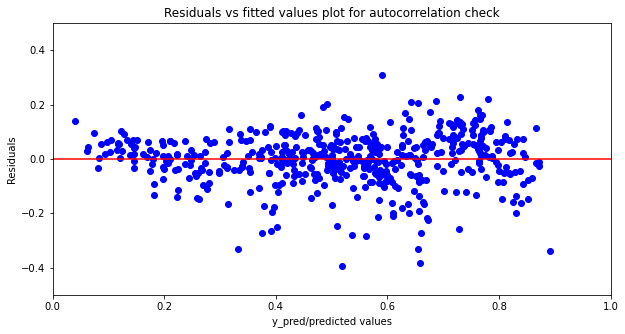

In [819]:
plt.figure(figsize=(10,5))
p = plt.scatter(y_train_pred,res,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
p = sns.lineplot([0,2],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

**Durbin Watson d test**

In [820]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(res)

2.0149784013042713

#### <b> <font color= darkslategray>Insights:<font>
- **From the Residual VS Fitted plot we can see that there is no pattern in the plot which suggestes absence of autocorrelation**
- **Durbin watson statistic lies within the range 1.5 to 2.5. This confirms that there is no auto correlation among residuals**

### <font color= indigo>5. Check for Homoscedasticity<font>

**Plotting Squared Residual against Predicted values**

(0.0, 1.0)

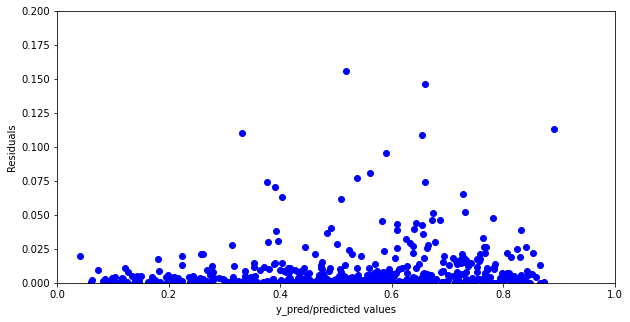

In [821]:
plt.figure(figsize=(10,5))
p = plt.scatter(y_train_pred,np.square(res),marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(0,0.2)
plt.xlim(0,1)

#### <b> <font color= darkslategray>Insights:<font>
- **From the plot we can see that there is no pattern i.e., predicted values are not systematically related to dquared residuals, which suggests no hetroscedasticity.**


## <font color= steelblue>11. Making Prediction using final model:<font>

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr11)

### <font color= indigo>Applying the scaling on the test sets<font>

In [822]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [823]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [824]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <font color= indigo>Dividing into X_test and y_test<font>

In [825]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [826]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm11 = sm.add_constant(X_test)
X_test_lm11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weekday_5     219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [827]:
# Making predictions using the final model (lr6)

y_pred = lr11.predict(X_test_lm11)

## <font color= steelblue>12. Model Evaluation:<font>

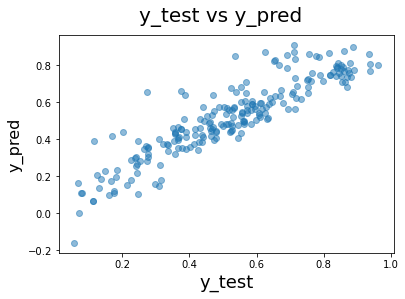

In [828]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### <font color= indigo>R^2 Value for TEST<font>

In [885]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred)
print("R^2: ", r2)

R^2:  0.8090791539085495


### <font color= indigo>Adjusted R^2 Value for TEST<font>

In [830]:
# We already have the value of R^2 (calculated in above step)

r2=0.8090791539085495

In [831]:
# Get the shape of X_test
X_test.shape

(219, 10)

In [886]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2: ", adjusted_r2)

Adjusted R^2:  0.7999002670772297


#### <b> <font color= darkslategray>Insights:<font>
- **R^2:  0.8090791539085495**
- **Adjusted R^2:  0.7999002670772297**

## <font color= steelblue>13. Model Validation using Cross Validation:<font>

In [833]:
#Removng the unwanted features from the whole dataset
Y_val= bike_new.pop("cnt")
X_val=bike_new[X_train_new.columns]

In [834]:
X_val.head()

,yr,temp,windspeed,season_2,season_4,mnth_9,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,14.110847,10.749882,0,0,0,0,1,1,0
1,0,14.902598,16.652113,0,0,0,0,0,1,0
2,0,8.050924,16.636703,0,0,0,0,0,0,0
3,0,8.200000,10.739832,0,0,0,0,0,0,0
4,0,9.305237,12.522300,0,0,0,0,0,0,0


In [836]:
X_val.shape

(730, 10)

In [837]:
X_val= sm.add_constant(X_val)
X_val.head()

,const,yr,temp,windspeed,season_2,season_4,mnth_9,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1.0,0,14.110847,10.749882,0,0,0,0,1,1,0
1,1.0,0,14.902598,16.652113,0,0,0,0,0,1,0
2,1.0,0,8.050924,16.636703,0,0,0,0,0,0,0
3,1.0,0,8.200000,10.739832,0,0,0,0,0,0,0
4,1.0,0,9.305237,12.522300,0,0,0,0,0,0,0


In [883]:
m = LinearRegression()

# Fit our training data
model = m.fit(X_val, Y_val)

# Perform 10-fold cross validation
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(m, X_val, Y_val, scoring='r2', cv=folds)
print("Cross-Predicted Accuracy:", scores)

Cross-Predicted Accuracy: [0.72989176 0.77325052 0.83800651 0.7018774  0.88398587 0.79298742
 0.76922972 0.79762838 0.87636621 0.84544893]


In [889]:
print("Mean Cross-Predicted Accuracy:", np.mean(scores))
print("Standard deviation of scores:", np.std(scores))

Mean Cross-Predicted Accuracy: 0.8008672733061708
Standard deviation of scores: 0.0571387414705046


In [888]:
pd.DataFrame([r2, adjusted_r2, np.mean(scores)], columns= ['Scores'], index=['R^2', 'Adjusted R^2', 'Cross Validated R2'])

,Scores
R^2,0.809079
Adjusted R^2,0.799900
Cross Validated R2,0.800867


#### <b> <font color= darkslategray>Insights:<font>
- **Cross Validated R2 is almost same as our R2 computed from test data. This suggests that our model is a good fit for the data.**


## <font color= steelblue>14. Final Report:<font>

- Train R^2 : **0.821**
- Train Adj. R^2 : **0.817**
- Test R^2 : **0.809**
- Test Adjusted R^2 : **0.799**     

**This seems to be a really good model that can very well 'Generalize' various datasets.**

As per our final Model, the top 3 predictor variables that influences the bike booking are: 

- **Temperature(temp)**: A coefficient value of ‘0.564587’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.564587 units.

- **Weather Situation 3 (weathersit_3)**: A coefficient value of ‘-0.298163’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.298163 units.

- **Year (yr)**: A coefficient value of ‘0.230728’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.230728 units.

**So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking**

**NOTE:**

The details of weathersit_1 & weathersit_3  
**weathersit_1**: Clear, Few clouds, Partly cloudy, Partly cloudy    
**weathersit_3**: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    

The details of season1 & season4   
**season1**: spring   
**season4**: winter    